# Loss Experiment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms

from src.models import MLP
from src.utils import init_dataloader
from src.utils import train
from src.visualize import LossVisualizer

DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=True,
    size=64 * (10000 // 64)
)

test_loader = init_dataloader(
    dataset_name='MNIST',
    transform=transform,
    batch_size=64,
    dataset_load_path='data/',
    train_mode=False,
    size=64 * (10000 // 64)
)

In [3]:
model = MLP(layers_num=2, hidden=256, input_channels=1, input_sizes=(28, 28), classes=10).to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

num_epochs = 10
losses = train(model, optimizer, criterion, train_loader, num_epochs, DEVICE)

  0%|          | 0/10 [00:00<?, ?it/s]

In [4]:
vis = LossVisualizer(model, train_loader, criterion, grid_step=0.1, direction_norm=10)

  0%|          | 0/441 [00:00<?, ?it/s]

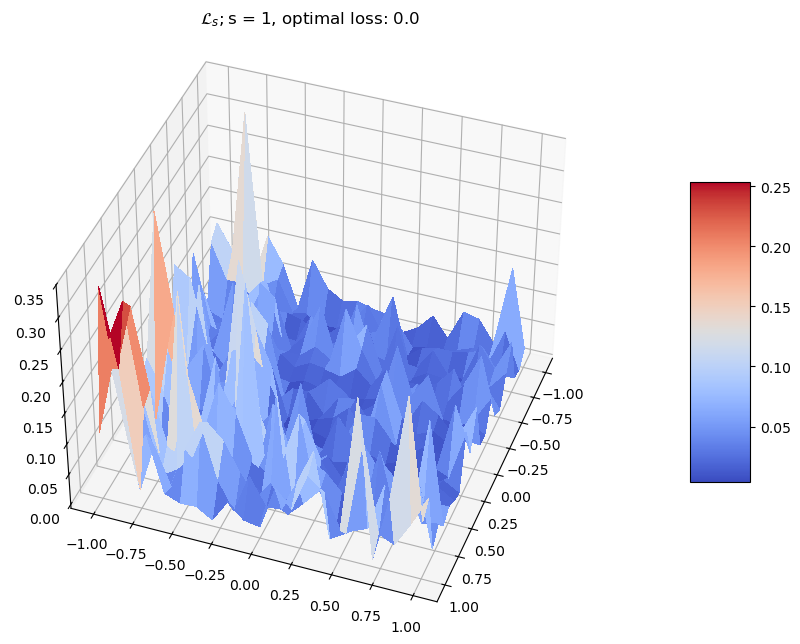

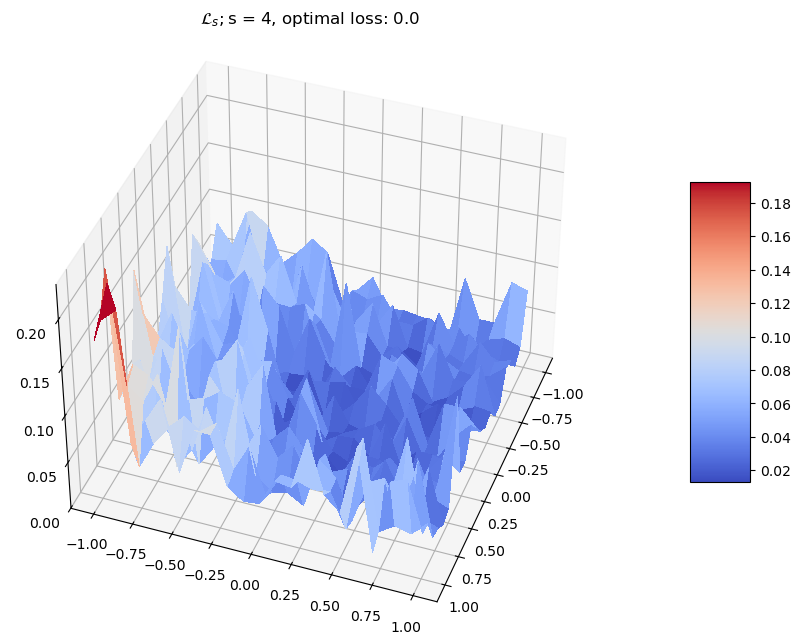

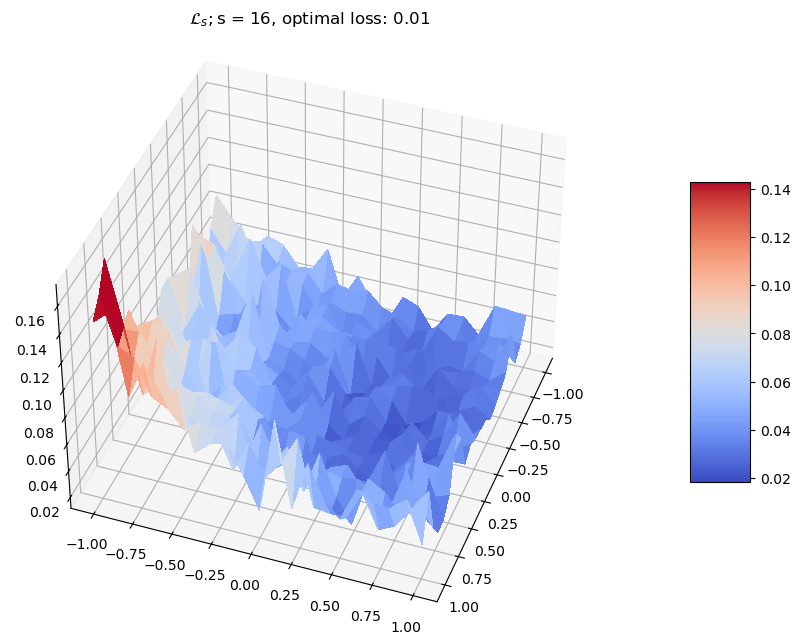

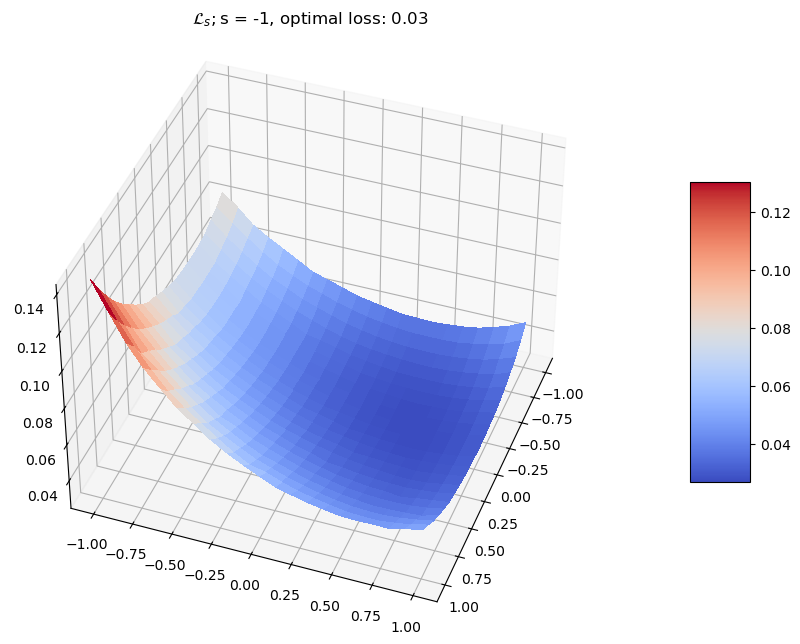

In [5]:
vis.visualize(size=1)
vis.visualize(size=4)
vis.visualize(size=16)
vis.visualize(size=-1)

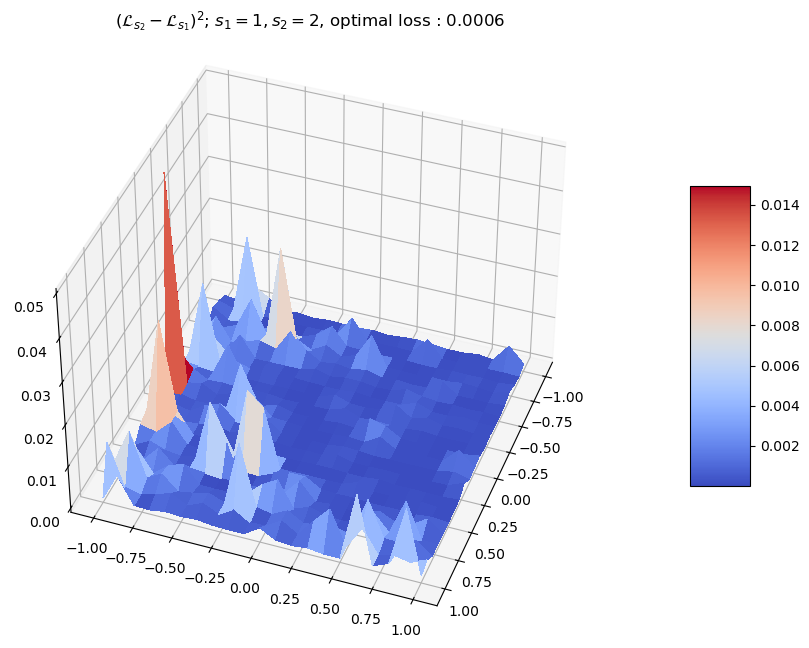

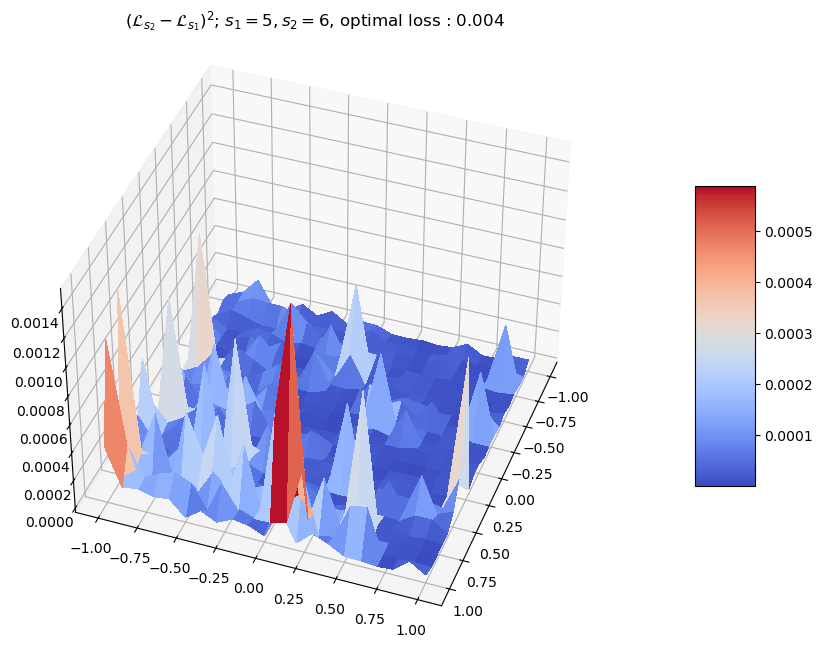

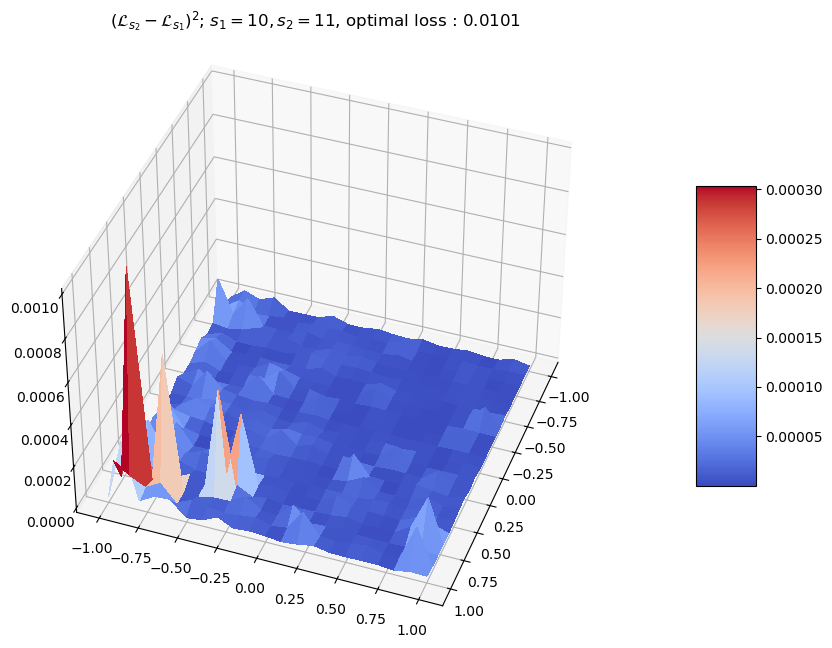

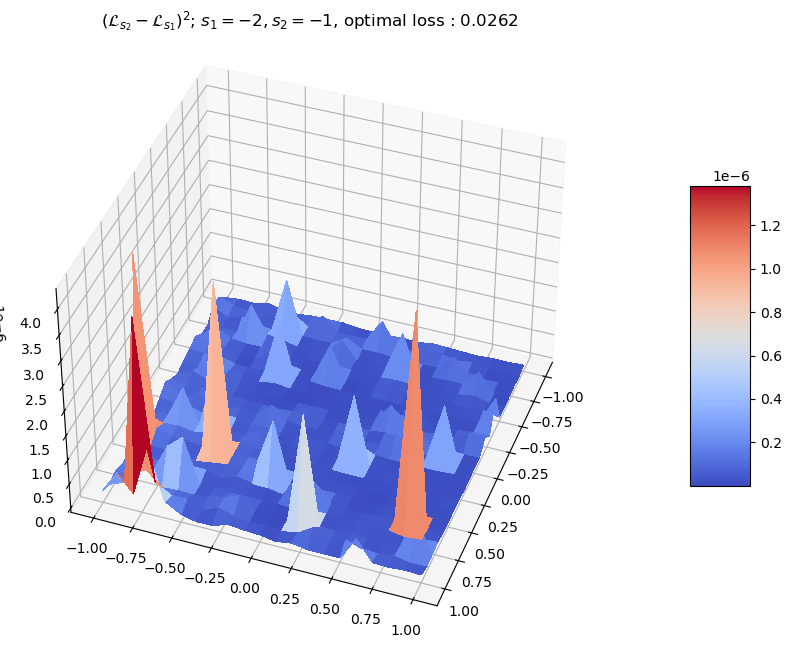

In [6]:
vis.visualize_diff(size1=1, size2=2, diff_type='square')
vis.visualize_diff(size1=5, size2=6, diff_type='square')
vis.visualize_diff(size1=10, size2=11, diff_type='square')
vis.visualize_diff(size1=-2, size2=-1, diff_type='square')

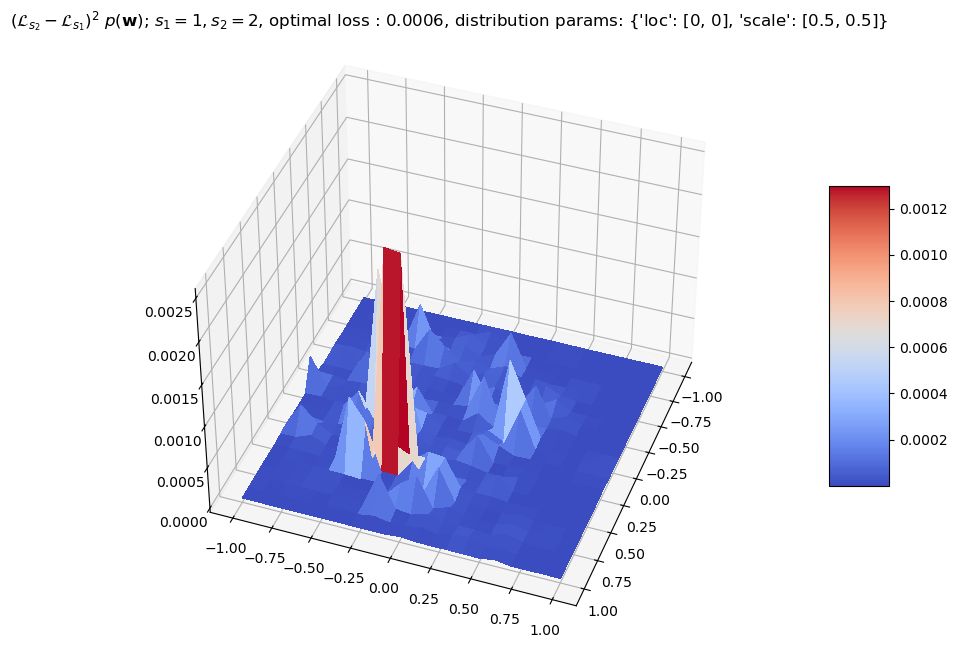

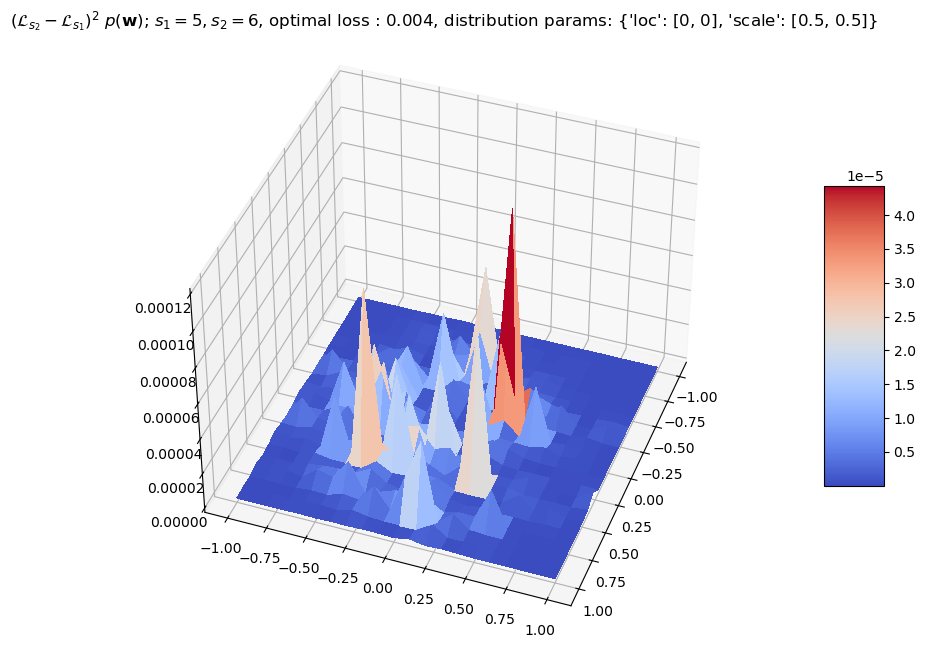

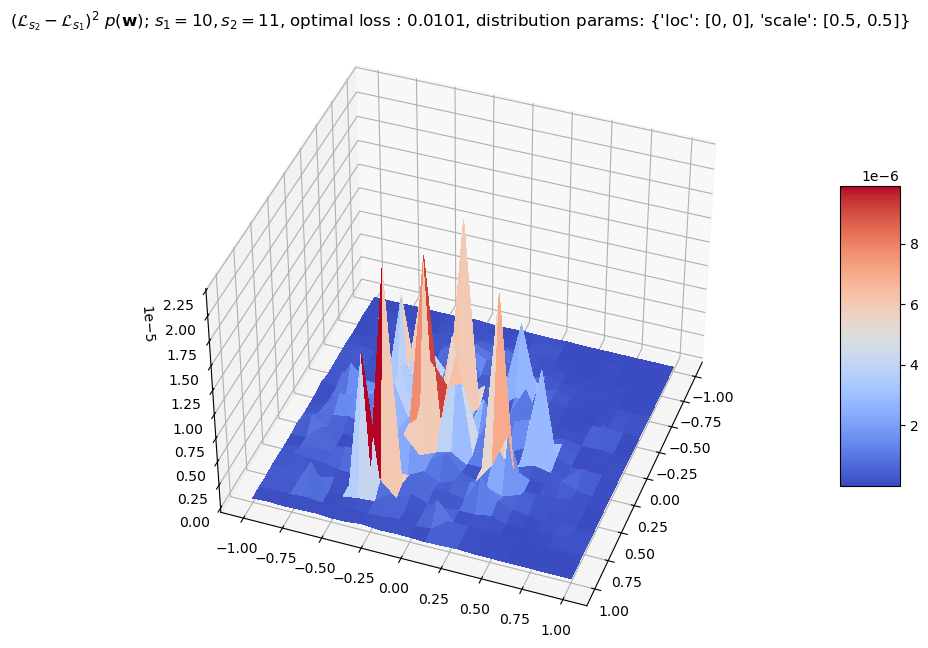

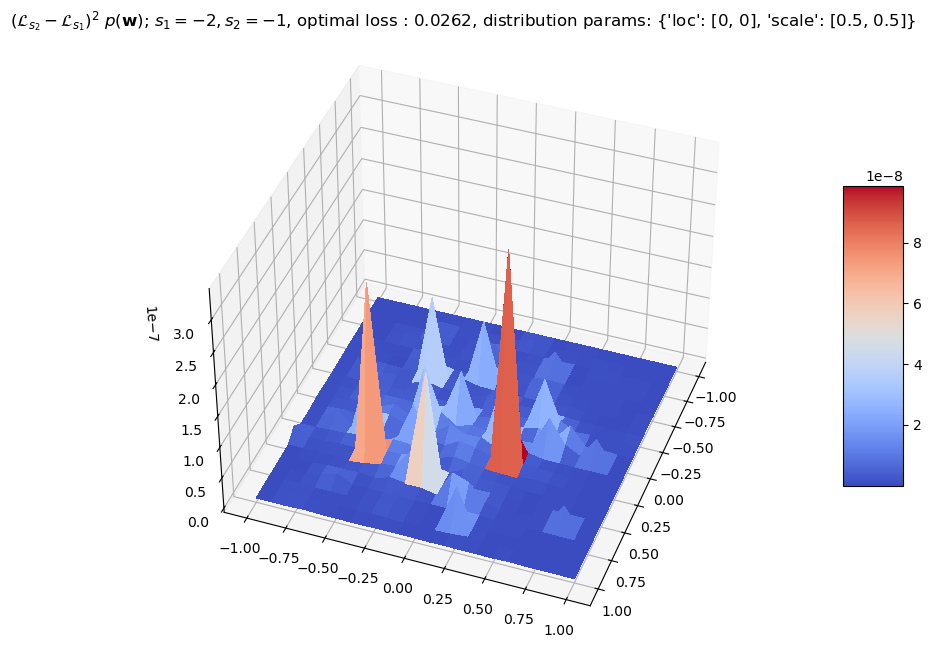

In [7]:
vis.visualize_diff(size1=1, size2=2,
                   diff_type='square_dot_normal',
                   distrib_params={'loc': [0, 0], 'scale': [0.5, 0.5]})
vis.visualize_diff(size1=5, size2=6,
                   diff_type='square_dot_normal',
                   distrib_params={'loc': [0, 0], 'scale': [0.5, 0.5]})
vis.visualize_diff(size1=10, size2=11,
                   diff_type='square_dot_normal',
                   distrib_params={'loc': [0, 0], 'scale': [0.5, 0.5]})
vis.visualize_diff(size1=-2, size2=-1,
                   diff_type='square_dot_normal',
                   distrib_params={'loc': [0, 0], 'scale': [0.5, 0.5]})